<img src="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/gridoffset-videogames-1-1585583517.jpg" style="width:50%"></img>

<h1> About Capstone Project: </h1>
I have decided to do a Case Study Capstone Project about...VIDEO GAMES (queue the confidetti, please). At the end of the Google Data Analytics course, we are provided with the opprotunity to work on a capstone project. We were given 2 tracks to complete our case study requirement. The first one they provided us with two options, analyze a historical bicycke trip or analyze a publicly available fitness tracker data. The second track allowed us to search for a public dataset that focuses on an area we are interested in. Although track sounded challenging, I really wanted to perform an analysis on my passions or interests... gaming of course. 

<h2> Scenario</h2>
I'm a junior data analyst working for a new game studio. I have been at your job for six months, and my boss feels that I'm ready for more responsibility. He has asked me to lead a project which consists of video game sales. He's interested in going into the gaming industry and would like some insight. Some of the questions he has are:

* Which country is largest contributor for game purchasing 
* When was there a peak and a decline in sales, and the possible reason 
* Is there a correlation between the number of games produced and revenue

Some questions I have asked to help me with this analysis are:
* Where can I find a dataset regarding gaming sales?
* How many individual games are there on the market?
* How many publishers are there and who are the top three?
* How many genres of games are there?
* How many gaming platforms are there?
* How many estimated gamers are there across the globe?
* What is the estimated revenue for games?







## Table of contents:

* Installing packages
* First look
* Cleaning the data
* Analyzing the data
* Conclusions

# Installing packages

In [ ]:
library(naniar)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# First look

### 1) Loading CSV file

* Assigning a CSV file to a data set:

In [ ]:
video_games_df <- read.csv("../input/vgsales/vgsales.csv")

### 2) Exploring tables

* Taking a look at the first six rows of "video_games_df" data set:

In [ ]:
head(video_games_df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


* Identifying the columns in the data set:

In [ ]:
colnames(video_games_df)

[1] "Rank"         "Name"         "Platform"     "Year"         "Genre"       
 [6] "Publisher"    "NA_Sales"     "EU_Sales"     "JP_Sales"     "Other_Sales" 
[11] "Global_Sales"

There are 11 columns, each describes certain properties of the game: 

a Rank, a Name, a Platform, the Year of release, a Genre, a company distributor, and the last 5 columns contain the number of sales in North America, Europe, Japan, Other unspecified regions, and global sales, all in million copies. 


* Determining the dimensional measures of a data set:

In [ ]:
dim(video_games_df)

[1] 16598    11

There are 11 columns and 16598 rows.

# Cleaning the data

### 1) Looking for missing values and duplicates

* Checking the data set on missing values:

In [ ]:
colSums(is.na(video_games_df))

Rank         Name     Platform         Year        Genre    Publisher 
           0            0            0            0            0            0 
    NA_Sales     EU_Sales     JP_Sales  Other_Sales Global_Sales 
           0            0            0            0            0

The result showcases that no missing values were found. 

However, upon investigation, by viewing the data set in a separate window, sorting reveals that missing values still remain. They are written as "N/A" and considered to be character type values.

* Assigning data set to another with replacing "N/A" with valid missing values:

In [ ]:
vgames_df <- video_games_df %>% dplyr::na_if("N/A")

Solution to this problem was found on the web page <https://cran.r-project.org/web/packages/naniar/vignettes/replace-with-na.html>
by Nicholas Tierney.

* Checking new data set on missing values:

In [ ]:
colSums(is.na(vgames_df))

Rank         Name     Platform         Year        Genre    Publisher 
           0            0            0          271            0           58 
    NA_Sales     EU_Sales     JP_Sales  Other_Sales Global_Sales 
           0            0            0            0            0

Now, column "Year" shows 271 missing values and column "Publisher" - 58.

* Visualizing missing values and row intersections:

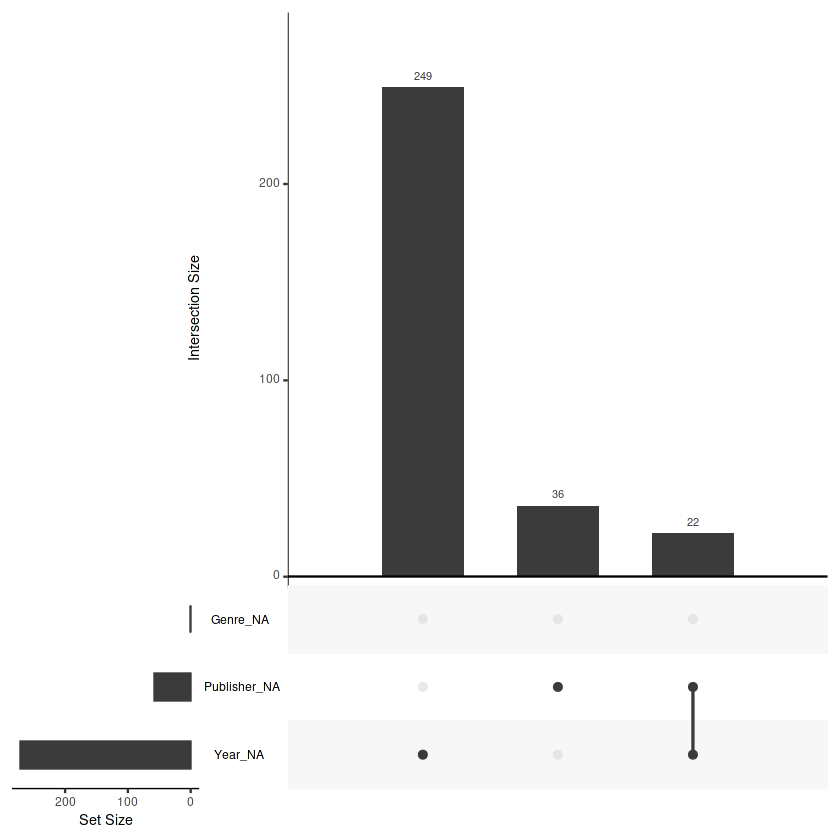

In [ ]:
gg_miss_upset(vgames_df)

The number of rows with missing values is 249 which accounts for 1.5% of all data set.

* Excluding rows with missing values and assigning the result to new clean data set:

In [ ]:
vgames_clean_df <- na.omit(vgames_df)

Now, vgames_clean_df contains no missing values

In [ ]:
dim(vgames_clean_df)

[1] 16291    11

* Checking data set for duplicated rows:

In [ ]:
sum(duplicated(vgames_clean_df))

[1] 0

There are no duplicate rows in the data set

### 2) Exploring the structure

In [ ]:
str(vgames_df)

'data.frame':	16598 obs. of  11 variables:
 $ Rank        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name        : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year        : chr  "2006" "1985" "2008" "2009" ...
 $ Genre       : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num  41.5 29.1 15.8 15.8 11.3 ...
 $ EU_Sales    : num  29.02 3.58 12.88 11.01 8.89 ...
 $ JP_Sales    : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales : num  8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ Global_Sales: num  82.7 40.2 35.8 33 31.4 ...


column "Rank" is integer type;

columns "Name", "Year", "Platform", "Genre", "Publisher" are character type;

columns "_Sales" are numerical type

However, column "Year" should be a numerical type:

* Converting the column "Year" to integer type:

In [ ]:
vgames_clean_df$Year <- as.integer(vgames_clean_df$Year)

* Reviewing descriptive statistics for each column:

In [ ]:
summary(vgames_clean_df)

      Rank           Name             Platform              Year     
 Min.   :    1   Length:16291       Length:16291       Min.   :1980  
 1st Qu.: 4132   Class :character   Class :character   1st Qu.:2003  
 Median : 8292   Mode  :character   Mode  :character   Median :2007  
 Mean   : 8290                                         Mean   :2006  
 3rd Qu.:12440                                         3rd Qu.:2010  
 Max.   :16600                                         Max.   :2020  
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16291       Length:16291       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2656   Mean   : 0.1477  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                       Max.   :41.4900   Max

Therefore, the time period in question lies between 1980 and 2020.

The highest number of sales in North America is 41.49, in Europe - 29.02, in Japan - 10.22 and Globaly - 82.74, all in millions of copies.

# Analysing the data

### 1) Counting various elements

* Counting the number of unique video games, publisher companies, genres, and platforms:

In [ ]:
print("Games:")
n_distinct(vgames_clean_df$Name)
print("Publishers:")
n_distinct(vgames_clean_df$Publisher)
print("Genres:")
n_distinct(vgames_clean_df$Genre)
print("Platforms:")
n_distinct(vgames_clean_df$Platform)

[1] "Games:"


[1] 11325

[1] "Publishers:"


[1] 576

[1] "Genres:"


[1] 12

[1] "Platforms:"


[1] 31

### 2) Visualising and analyzing SALES in all regions

In [ ]:
annual_sales <- vgames_clean_df %>% group_by(Year) %>% summarize(NA_Sales = sum(NA_Sales), 
                                                                 EU_Sales = sum(EU_Sales),
                                                                 JP_Sales = sum(JP_Sales),
                                                                 Other_Sales = sum(Other_Sales),
                                                                 Global_Sales = sum(Global_Sales))

* Creating a plot of annual_sales in North America, Europe, Japan and other countries:

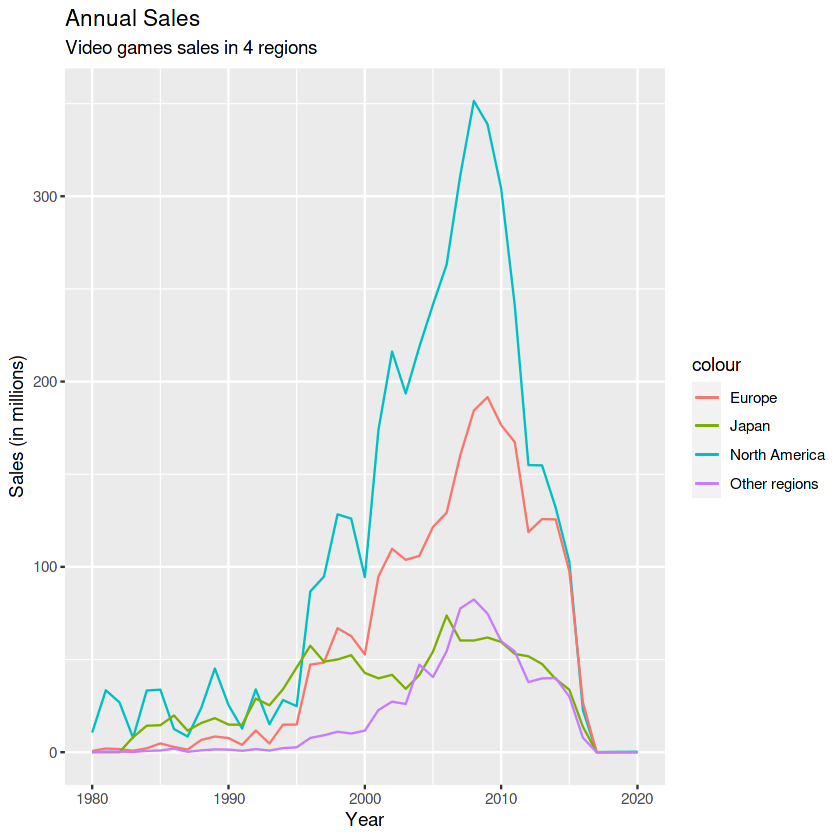

In [ ]:
ggplot(data=annual_sales) + geom_line(aes(x=Year, y=NA_Sales, color="North America")) + 
  geom_line(aes(x=Year, y=EU_Sales, color="Europe")) + 
  geom_line(aes(x=Year, y=JP_Sales, color="Japan")) + 
  geom_line(aes(x=Year, y=Other_Sales, color="Other regions")) + 
  labs(title='Annual Sales', subtitle = "Video games sales in 4 regions") + 
  xlab(label = 'Year') +
  ylab(label = 'Sales (in millions)')

According to the line graph, since 1980, in North America figures had fluctuated between approximately 10 to 50 million sales in a year, with sales in other regions rising slightly until 1995. In 1995 a substantial increase occurred in all regions.

Sales in all regions reached their peaks in the period from 2006 to 2009, with North America's sales peaking at 350 million copies in 2007. 

However, later in the timeline, the figures for all regions experienced a sharp decline.

* Creating a plot of global annual_sales:

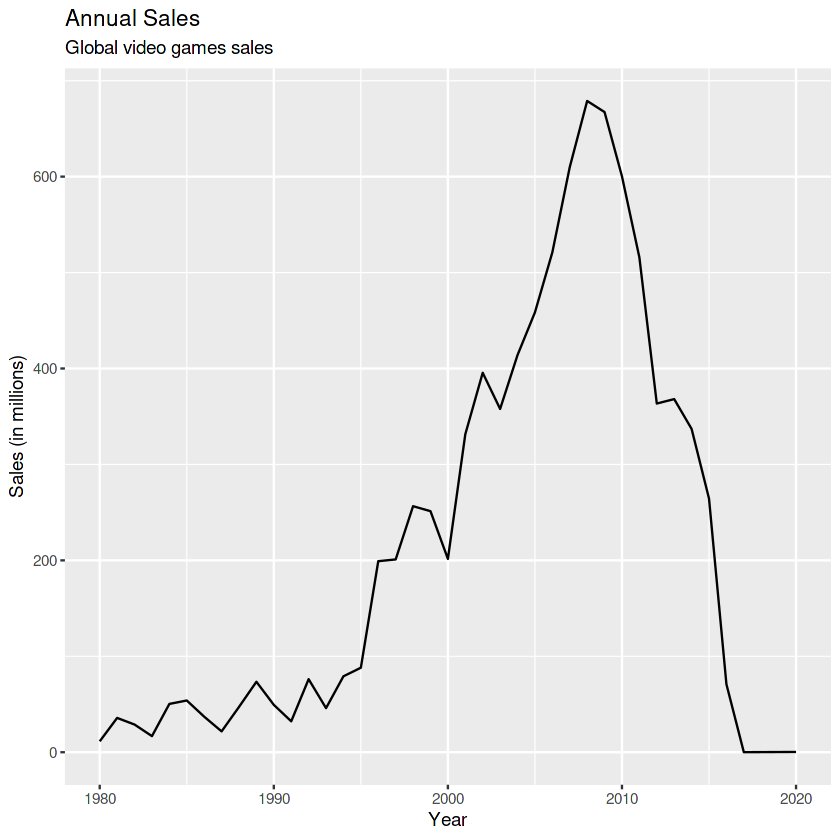

In [ ]:
ggplot(data=annual_sales) + geom_line(aes(x=Year, y=Global_Sales), color="black") + 
  labs(title='Annual Sales', subtitle = "Global video games sales") + 
  xlab(label = 'Year') +
  ylab(label = 'Sales (in millions)')

Global sales peaked at about 670 million copies in 2009.

### 3) Visualising and analysing PLATFORMS

In [ ]:
platforms_df <- vgames_clean_df %>% group_by(Platform) %>% summarize(NA_Sales = sum(NA_Sales), 
                                                                 EU_Sales = sum(EU_Sales),
                                                                 JP_Sales = sum(JP_Sales),
                                                                 Other_Sales = sum(Other_Sales),
                                                                 Global_Sales = sum(Global_Sales))

* Selecting only 5 most popular platforms:

In [ ]:
popular_platforms <- platforms_df %>% arrange(desc(Global_Sales)) %>% head(5)

* Creating a plot for showcasing the numbers of games which are distributed on examined platforms:

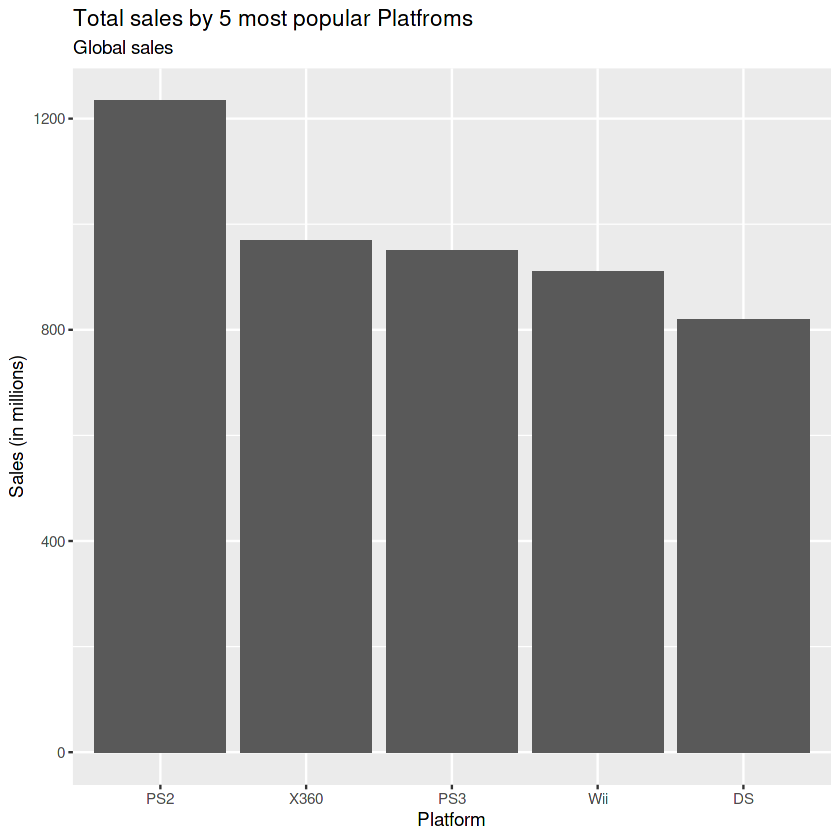

In [ ]:
popular_platforms %>% 
  ggplot(aes(x=reorder(Platform, -Global_Sales), y=Global_Sales)) + 
  geom_bar(stat="identity") + 
  labs(title='Total sales by 5 most popular Platfroms', subtitle = "Global sales") + 
  xlab(label = 'Platform') +
  ylab(label = 'Sales (in millions)')

According to the bar chart, the most popular gaming platforms globally are PS2, X360, PS3, Wii and DS, in descending order.

* To properly review the regional distribution, the data set has to be converted into a long format:

In [ ]:
popular_platforms_dfm <- pivot_longer(popular_platforms, -Platform, names_to="variable", values_to="sales")

* Creating a plot for regional distribution on 5 popular platforms:

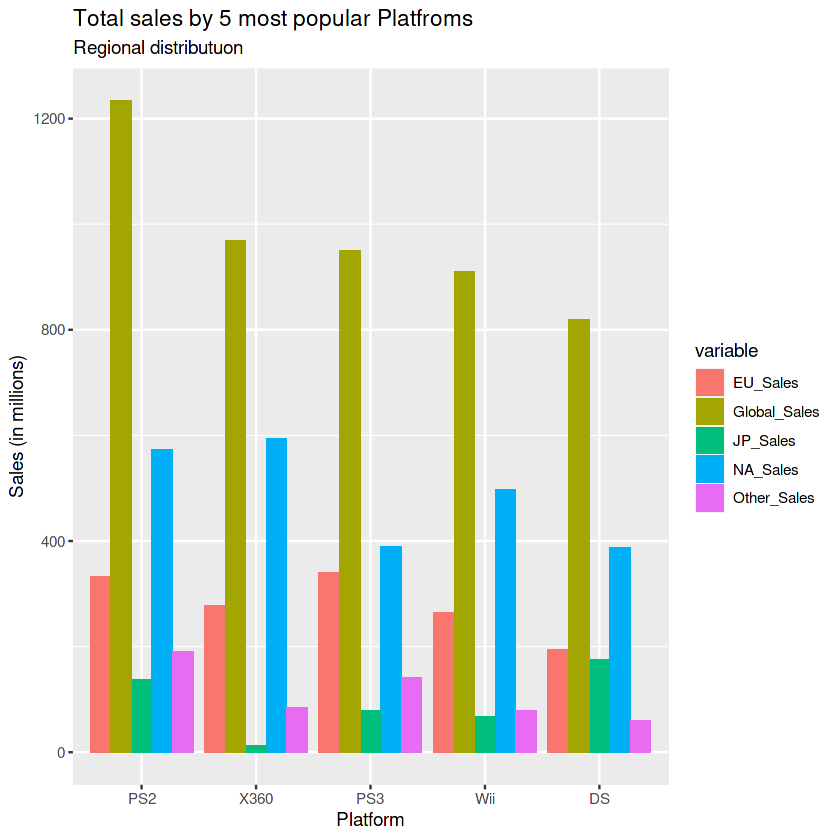

In [ ]:
ggplot(popular_platforms_dfm, aes(x=reorder(Platform, -sales), y = sales)) + 
  geom_bar(aes(fill = variable), stat = "identity", position = "dodge") +
  labs(title='Total sales by 5 most popular Platfroms', subtitle = "Regional distributuon") + 
  xlab(label = 'Platform') +
  ylab(label = 'Sales (in millions)')

For PS2, X360, Wii and DS the vast majority of sales comes from North America. Europe contributes for almost a half of North America's sales, with the exception of PS3 in which both are practically even. In contrast, Japan and other regions account for a small portion of sales for these specific publishers.  


### 4) Visualising and analysing GENRES

In [ ]:
genres_df <- vgames_clean_df %>% group_by(Genre) %>% summarize(NA_Sales = sum(NA_Sales), 
                                                               EU_Sales = sum(EU_Sales),
                                                               JP_Sales = sum(JP_Sales),
                                                               Other_Sales = sum(Other_Sales),
                                                               Global_Sales = sum(Global_Sales)) %>% 
  arrange(-Global_Sales)

* Creating a bar chart of genres:

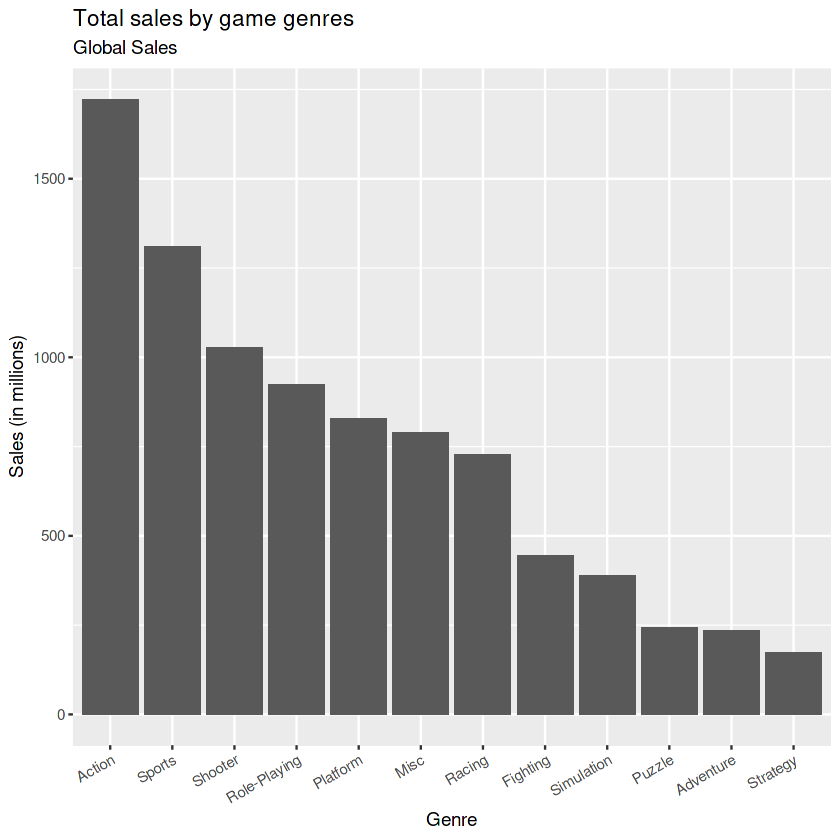

In [ ]:
ggplot(genres_df) + 
  geom_bar(aes(x=reorder(Genre, -Global_Sales), y=Global_Sales), stat="identity") + 
  labs(title='Total sales by game genres', subtitle = "Global Sales") +
  xlab(label = 'Genre') +
  ylab(label = 'Sales (in millions)') + 
  theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1))

Solution for rotation of the x-axis was found on web page <https://www.r-bloggers.com/2021/09/how-to-rotate-axis-labels-in-ggplot2/> 

According to the graph, globally "Action" games are in the lead, while "Strategy" is the least prefirable genre.

* Creating a pie chart of genres:

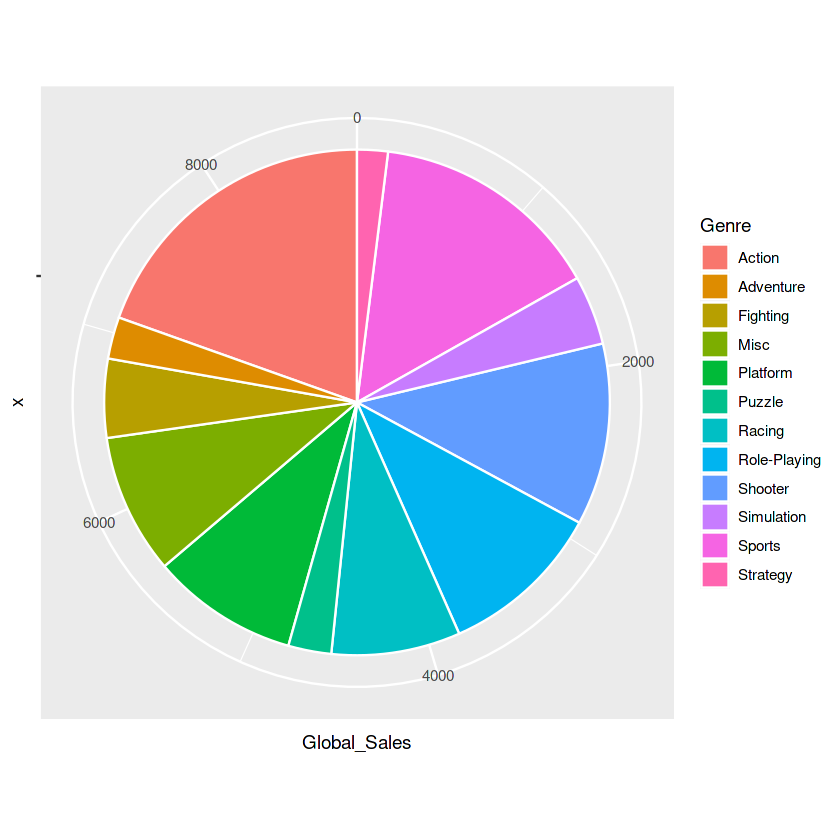

In [ ]:
ggplot(genres_df, aes(x="", y=Global_Sales, fill=Genre)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar('y', start=0)

* Identifying 5 most popular game genres:

In [ ]:
popular_genres <- genres_df %>% head(5)
popular_genres

Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13


The top five most popular genres are "Action", "Sports", "Shooter", "Role-Playing", and "Platform".

* Again, for a proper regional distribution a data set has to be converted in to a long format:

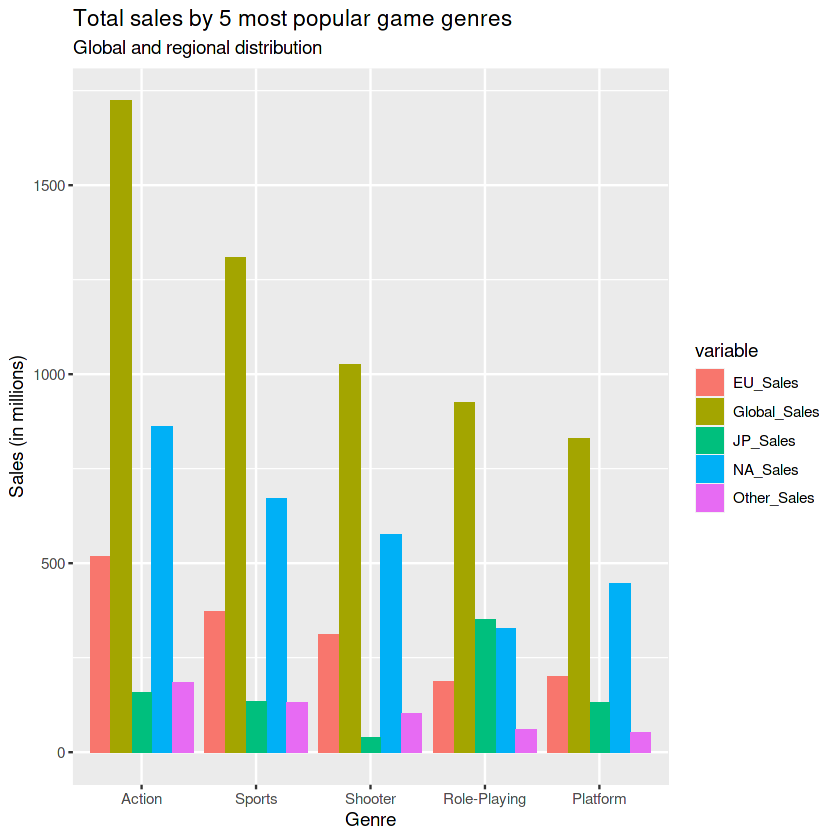

In [ ]:
popular_genres_dfm <- pivot_longer(popular_genres, -Genre, names_to="variable", values_to="sales")

ggplot(popular_genres_dfm, aes(x=reorder(Genre, -sales), y = sales)) + 
  geom_bar(aes(fill = variable), stat = "identity", position = "dodge") + 
  labs(title='Total sales by 5 most popular game genres', subtitle = "Global and regional distribution") + 
  xlab(label = 'Genre') +
  ylab(label = 'Sales (in millions)')

The Action, Sports, Shooter and Platform genres are mostly popular in North America, however in Japan Role-play games are favored more than in other regions. 


### 5) Visualising and analysing PUBLISHERS

In [ ]:
publisher_df <- vgames_clean_df %>% group_by(Publisher) %>% summarize(NA_Sales = sum(NA_Sales),                                                                  EU_Sales = sum(EU_Sales),
                                                                JP_Sales = sum(JP_Sales),
                                                                 Other_Sales = sum(Other_Sales),
                                                                 Global_Sales = sum(Global_Sales)) %>% 
  arrange(-Global_Sales)

* Selecting only 3 most commercially successful game developing companies:

In [ ]:
popular_publishers <- publisher_df %>% head(3)
popular_publishers

Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41


There are "Nintendo", "Electronic Arts", and "Activision"

* For a regional distribution a data set has to be converted in to a long format:

In [ ]:
popular_publishers_dfm <- pivot_longer(popular_publishers, -Publisher, names_to="variable", values_to="sales")

* Creating a bar plot for regional distribution:

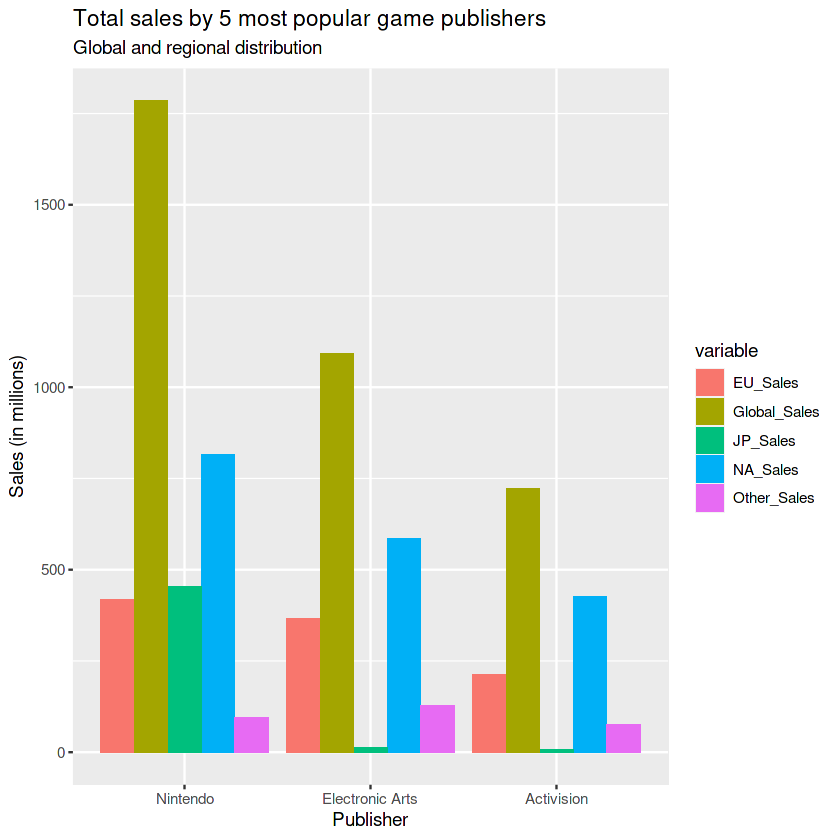

In [ ]:
ggplot(popular_publishers_dfm, aes(x=reorder(Publisher, -sales), y = sales)) + 
  geom_bar(aes(fill = variable), stat = "identity", position = "dodge") + 
  labs(title='Total sales by 5 most popular game publishers', subtitle = "Global and regional distribution") + 
  xlab(label = 'Publisher') +
  ylab(label = 'Sales (in millions)')

The most profitable game publishers are Nintendo, Electronic Arts and Activision, with North America being the primary purchasing region. For Nintendo the number of copies bought in Japan is slightly higher than in the Europe. Electronic Arts and Activision are the least favored publishers in Japan.

* Creating a list of 3 most profitable publishers:

In [ ]:
pop_publ_list = as.list(popular_publishers$Publisher)

### 6) Analyzing the most commercially successful games of these publishers

* Filtering initial cleaned data set only to showcase the information about 3 publishers, studied above:

In [1]:
only_pop_publishers <- vgames_clean_df[vgames_clean_df$Publisher %in% pop_publ_list, ]

top_publ <- only_pop_publishers %>% group_by(Publisher) %>% summarize(Global_Sales = max(Global_Sales), )

top_publ %>% arrange(-Global_Sales)

ERROR: ignored

* The bestseller of Nintendo:

In [ ]:
Nintendo_df <- only_pop_publishers[only_pop_publishers$Publisher == 'Nintendo', ] %>% arrange(-Global_Sales)

Nintendo_df_1 <- Nintendo_df %>% head(1)

Nintendo_df_1$Name
Nintendo_df_1$Year
Nintendo_df_1$Global_Sales

* The number of games Nintendo produced:

In [ ]:
n_distinct(Nintendo_df$Name)

* The bestseller of Activision:

In [ ]:
Activision_df <- only_pop_publishers[only_pop_publishers$Publisher == 'Activision', ] %>% arrange(-Global_Sales) 

Activision_df_1 <- Activision_df %>% head(1)

Activision_df_1$Name
Activision_df_1$Year
Activision_df_1$Global_Sales

* The number of games Activision produced:

In [ ]:
n_distinct(Activision_df$Name)

* The bestseller of Electronic Arts:

In [ ]:
EA_df <- only_pop_publishers[only_pop_publishers$Publisher == 'Electronic Arts', ] %>% arrange(-Global_Sales) 

EA_df_1 <- EA_df %>% head(1)

EA_df_1$Name
EA_df_1$Year
EA_df_1$Global_Sales

* The number of games Electronic Arts produced:

In [ ]:
n_distinct(EA_df$Name)

### 7) Relation between sales and the number of games produced by three companies

* Data set for Nintendo:

In [ ]:
count_Sales_df_Nin <- vgames_clean_df[vgames_clean_df$Publisher == 'Nintendo', ] %>% group_by(Year) %>% summarize(Global_Sales_Nin = sum(Global_Sales), GameCount_Nin = n_distinct(Name))

count_Sales_df_Nin$Publisher_Nin = 'Nintendo'

* Data set for Activision: 

In [ ]:
count_Sales_df_Ac <- vgames_clean_df[vgames_clean_df$Publisher == 'Activision', ] %>% group_by(Year) %>% summarize(Global_Sales_Ac = sum(Global_Sales), GameCount_Ac = n_distinct(Name))

count_Sales_df_Ac$Publisher_Ac = 'Activision'

* Data set for Electronic Arts:

In [ ]:
count_Sales_df_EA <- vgames_clean_df[vgames_clean_df$Publisher == 'Electronic Arts', ] %>% group_by(Year) %>% summarize(Global_Sales_EA = sum(Global_Sales), GameCount_EA = n_distinct(Name))

count_Sales_df_EA$Publisher_EA = 'Electronic Arts'

* Merging all three data sets on "Year":

In [ ]:
count_Sales_df <- merge(count_Sales_df_Nin, count_Sales_df_Ac, by="Year")
count_Sales_df <- merge(count_Sales_df, count_Sales_df_EA, by="Year")

* Creating a plot of annual global sales of three studied Publishers:

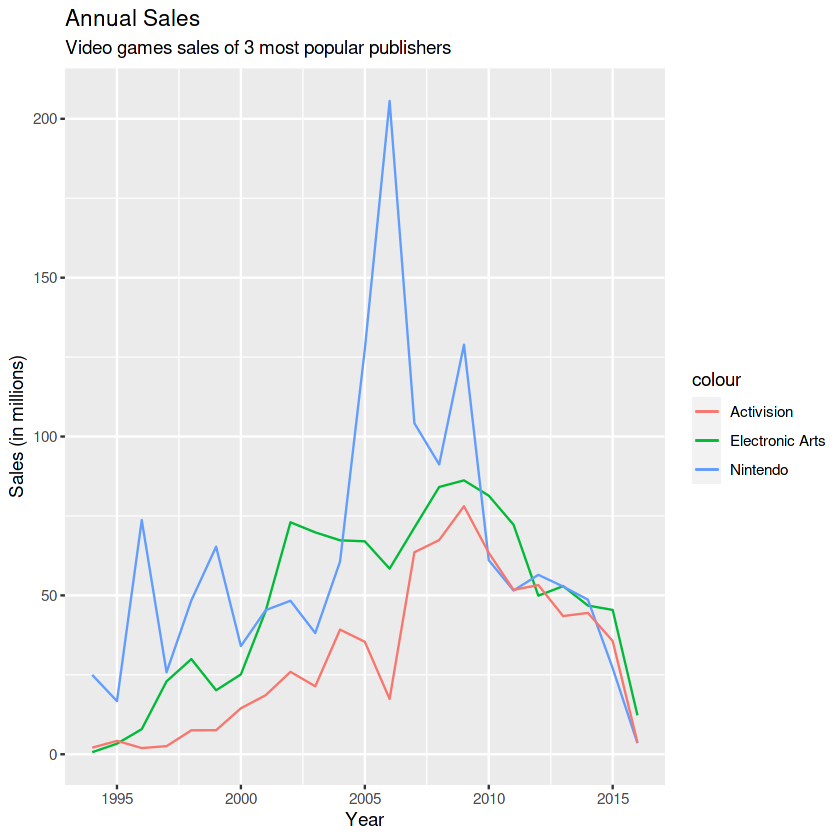

In [ ]:
ggplot(data=count_Sales_df) + 
  geom_line(aes(x=Year, y=Global_Sales_EA, color="Electronic Arts")) + 
  geom_line(aes(x=Year, y=Global_Sales_Nin, color="Nintendo")) + 
  geom_line(aes(x=Year, y=Global_Sales_Ac, color="Activision")) + 
  labs(title='Annual Sales', subtitle = "Video games sales of 3 most popular publishers") + 
  xlab(label = 'Year') +
  ylab(label = 'Sales (in millions)')

* Creating a plot of the number of games released every year of three studied Publishers:

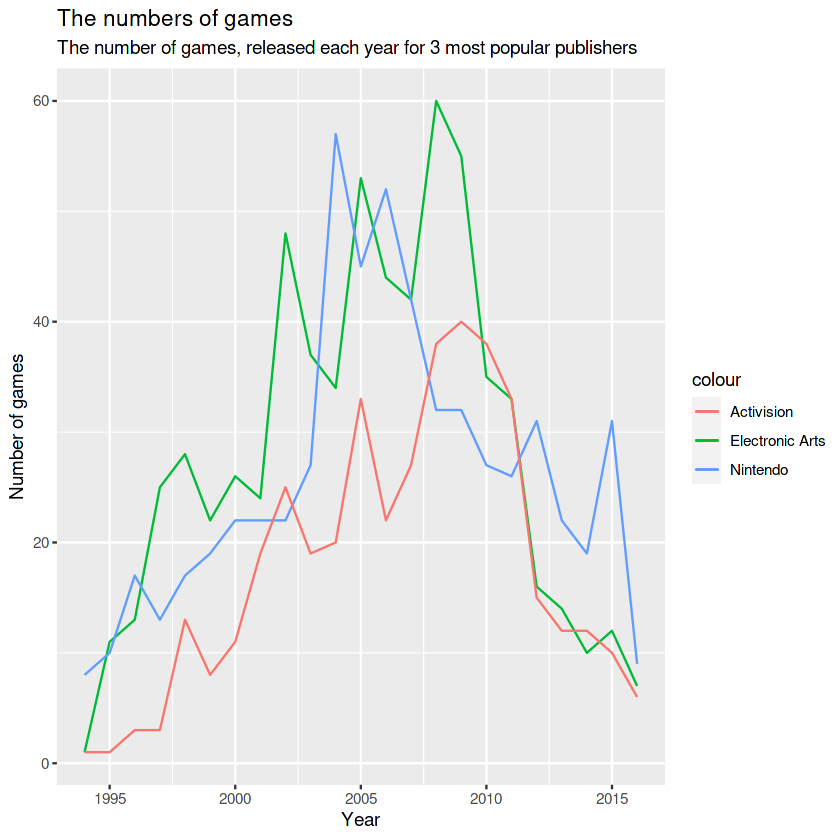

In [ ]:
ggplot(data=count_Sales_df) + 
  geom_line(aes(x=Year, y=GameCount_EA, color="Electronic Arts")) + 
  geom_line(aes(x=Year, y=GameCount_Nin, color="Nintendo")) + 
  geom_line(aes(x=Year, y=GameCount_Ac, color="Activision")) + 
  labs(title='The numbers of games', subtitle = "The number of games, released each year for 3 most popular publishers") + 
  xlab(label = 'Year') +
  ylab(label = 'Number of games')

* Looking for correlations:

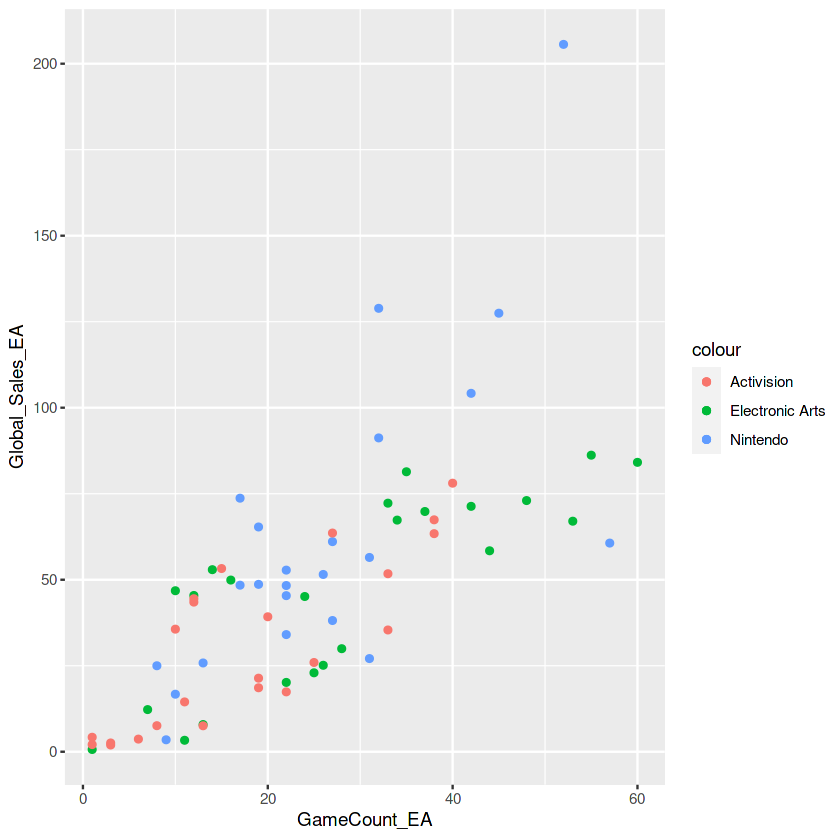

In [ ]:
ggplot(data=count_Sales_df) + 
  geom_point(aes(x=GameCount_EA, y=Global_Sales_EA, color="Electronic Arts")) + 
  geom_point(aes(x=GameCount_Nin, y=Global_Sales_Nin, color="Nintendo")) + 
  geom_point(aes(x=GameCount_Ac, y=Global_Sales_Ac, color="Activision"))

* Adding trend lines for better perception:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



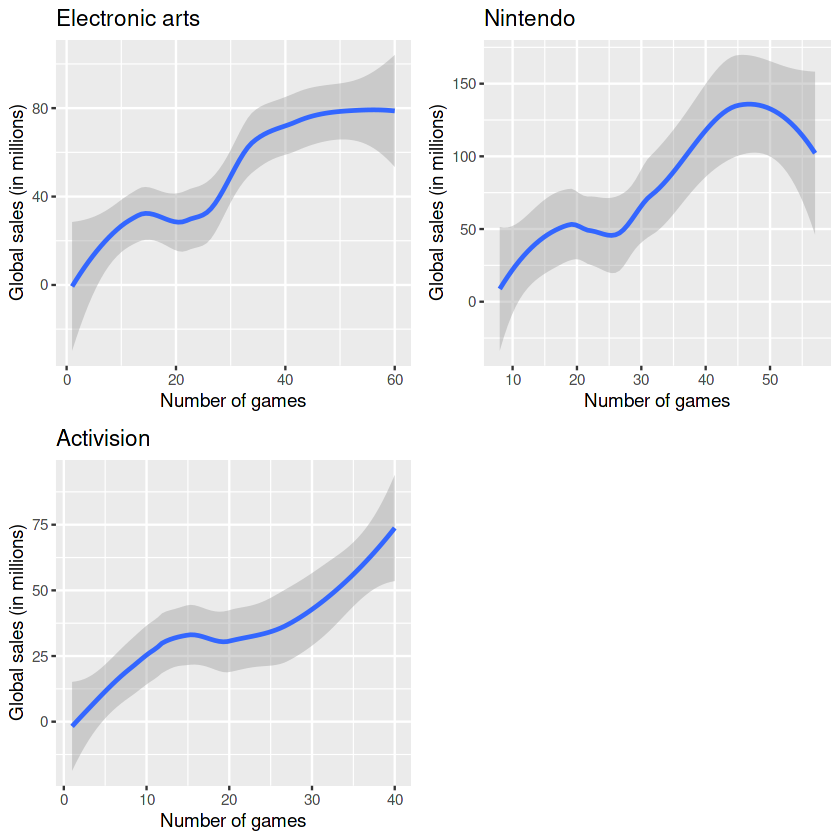

In [ ]:
pl1 <- ggplot(data=count_Sales_df) + 
  geom_smooth(aes(x=GameCount_EA, y=Global_Sales_EA)) + 
  labs(title='Electronic arts') + 
  xlab(label = 'Number of games') +
  ylab(label = 'Global sales (in millions)')

pl2 <- ggplot(data=count_Sales_df) +
  geom_smooth(aes(x=GameCount_Nin, y=Global_Sales_Nin)) + 
  labs(title='Nintendo') + 
  xlab(label = 'Number of games') +
  ylab(label = 'Global sales (in millions)')

pl3 <- ggplot(data=count_Sales_df) + 
  geom_smooth(aes(x=GameCount_Ac, y=Global_Sales_Ac)) + 
  labs(title='Activision') + 
  xlab(label = 'Number of games') +
  ylab(label = 'Global sales (in millions)')

ggarrange(pl1, pl2, pl3, ncol = 2, nrow = 2)

Therefore, for the most part, the number of published games is in the direct relation to the global sales figures. 

<img src="https://flyclipart.com/thumb2/video-games-mcd-video-games-449665.png" style="width:50%"></img>

# Conclusions

You will see that the dataset covers the time period between 1980 and 2020, with North America is the largest contributor for video game purchasing. Before hitting the peak in 2009, figures for sales grew moderately at first and rocketed in the 2000s. but had a sharp decline which can be explained by lack of data on games released after 2017 (There are 3 games from 2017 and only one from 2020). There are 11325 individual games, and 576 publishers. With the top three publishers being "Nintendo", "Electronic Arts", and "Activision". In total there are about 12 game genres, "Action" is the most popular, "Strategy" is the least popular. There are 31 gaming platforms, where the PS2 (Play Station 2) being first. You can see there is a direct correlation between the number of games produced and revenue, according to the analysis on the 3 most commercially successful publishers.

There is an estimate of 2.8 billion players around the globe as of 2021, according to [Satista](https://www.statista.com/statistics/748044/number-video-gamers-world/) and an estimate of 2.95 billion by the end of 2022. The revenue for gaming in 2022 had reached over 159.3 billion dollars ans is only expected to grow, according to [Finances Online](https://financesonline.com/number-of-gamers-worldwide/) Games revenues for 2020 reached over $159.3 billion. The gaming industry is only climbing it's way up and would be a great investment in the market.

